<a href="https://colab.research.google.com/github/bharadwaj-2003/TASK-4-Develop-a-Neural-Network-that-can-read-Handwriting/blob/main/task_4LGM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LGM VIP TASK 4: Develop a Neural Network that can read Handwriting
#Advanced Level
#Name : Bharadwaj s

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


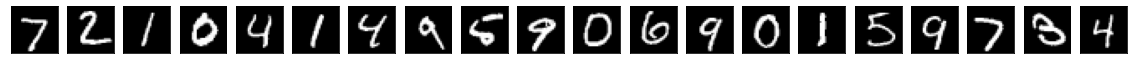

In [ ]:
import matplotlib.pyplot as plt
n = 20  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [ ]:
print("Previous x_train shape: {} \nPrevious y_train shape:{}".format(x_train.shape, y_train.shape))
x_train = x_train.reshape(60000, 784)     
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')     
x_test = x_test.astype('float32')     
x_train /= 255    
x_test /= 255
classes = 10
y_train = np_utils.to_categorical(y_train, classes)     
y_test = np_utils.to_categorical(y_test, classes)
print("New x_train shape: {} \nNew y_train shape:{}".format(x_train.shape, y_train.shape))

Previous x_train shape: (60000, 28, 28) 
Previous y_train shape:(60000,)
New x_train shape: (60000, 784) 
New y_train shape:(60000, 10)


In [ ]:
input_size = 784
batch_size = 200   
hidden1 = 400
hidden2 = 20
epochs = 2

In [ ]:
model = Sequential()     
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))

model.add(Dense(hidden2, activation='relu'))
model.add(Dense(classes, activation='softmax')) 

model.compile(loss='categorical_crossentropy', 
metrics=['accuracy'], optimizer='sgd')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 20)                8020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 322,230
Trainable params: 322,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=100, verbose=2)

Epoch 1/100
300/300 - 3s - loss: 1.5909 - accuracy: 0.5982 - 3s/epoch - 8ms/step
Epoch 2/100
300/300 - 2s - loss: 0.6921 - accuracy: 0.8426 - 2s/epoch - 6ms/step
Epoch 3/100
300/300 - 2s - loss: 0.4828 - accuracy: 0.8772 - 2s/epoch - 6ms/step
Epoch 4/100
300/300 - 2s - loss: 0.4061 - accuracy: 0.8923 - 2s/epoch - 6ms/step
Epoch 5/100
300/300 - 2s - loss: 0.3648 - accuracy: 0.9002 - 2s/epoch - 6ms/step
Epoch 6/100
300/300 - 2s - loss: 0.3378 - accuracy: 0.9068 - 2s/epoch - 6ms/step
Epoch 7/100
300/300 - 2s - loss: 0.3174 - accuracy: 0.9115 - 2s/epoch - 6ms/step
Epoch 8/100
300/300 - 2s - loss: 0.3014 - accuracy: 0.9161 - 2s/epoch - 6ms/step
Epoch 9/100
300/300 - 2s - loss: 0.2879 - accuracy: 0.9205 - 2s/epoch - 6ms/step
Epoch 10/100
300/300 - 2s - loss: 0.2764 - accuracy: 0.9232 - 2s/epoch - 6ms/step
Epoch 11/100
300/300 - 2s - loss: 0.2660 - accuracy: 0.9261 - 2s/epoch - 6ms/step
Epoch 12/100
300/300 - 2s - loss: 0.2569 - accuracy: 0.9287 - 2s/epoch - 6ms/step
Epoch 13/100
300/300 - 2s

313/313 [==============================] - 1s 2ms/step - loss: 0.0806 - accuracy: 0.9748

Test accuracy: 0.9747999906539917
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]


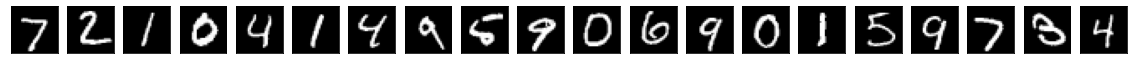

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('\n''Test accuracy:', score[1])
mask = range(0,20)
x_valid = x_test[mask]
predict_y=model.predict(x_valid) 
classes_y=np.argmax(predict_y,axis=1)
print(classes_y)

# display original
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()